# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [204]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [205]:
"""
* The following assumes 'Jupyter Notebook' command is run where the dataset 'bc2.csv' resides
* Configure os path accordingly if your current working directory is different
"""
breastmass = pd.read_csv(os.path.join('', 'bc2.csv'))
breastmass.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [206]:
breastmass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


### Use summary statistics to check if missing values, outlier and encoding treament is necessary

In [207]:
df_breastmass = breastmass.drop('ID',axis=1)

In [208]:
for col_name in df_breastmass.columns:
    df_breastmass[col_name].fillna(df_breastmass[col_name].mode()[0], inplace=True)

In [209]:
from scipy.stats import zscore
df_breastmass_zscore = df_breastmass.drop('Bare Nuclei',axis=1)
df_breastmass_zscore = df_breastmass_zscore.apply(zscore)
df_breastmass_zscore.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,699.000000
mean,-5.082566e-17,-9.148619e-17,-3.049540e-17,5.082566e-17,5.082566e-17,3.049540e-17,-1.321467e-16,-8.132106e-17,0.000000
std,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716
min,-1.214667e+00,-6.999951e-01,-7.432990e-01,-6.332472e-01,-1.001495e+00,-1.000471e+00,-6.118250e-01,-3.439118e-01,-0.725397
25%,-8.592662e-01,-6.999951e-01,-7.432990e-01,-6.332472e-01,-5.495614e-01,-5.900668e-01,-6.118250e-01,-3.439118e-01,-0.725397
50%,-1.484649e-01,-6.999951e-01,-7.432990e-01,-6.332472e-01,-5.495614e-01,-1.796621e-01,-6.118250e-01,-3.439118e-01,-0.725397
75%,5.623364e-01,6.117919e-01,6.035993e-01,4.181537e-01,3.543054e-01,6.411472e-01,3.713145e-01,-3.439118e-01,1.378555
max,1.983939e+00,2.251526e+00,2.287222e+00,2.520955e+00,3.065906e+00,2.693171e+00,2.337594e+00,4.907421e+00,1.378555


### Check Missing Values

In [210]:
df_breastmass[df_breastmass.isnull().any(axis=1)]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [211]:
df_breastmass.describe(include='all')

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [212]:
df_breastmass.shape

(699, 10)

In [213]:
df_breastmass[df_breastmass['Bare Nuclei'] != '?'].shape

(683, 10)

In [214]:
top = df_breastmass.describe(include='all')['Bare Nuclei'].top
df_breastmass['Bare Nuclei'] = df_breastmass['Bare Nuclei'].replace('?',top)

In [215]:
df_breastmass.shape

(699, 10)

### Print and plot the distribution of target variable (Class - using Histogram) 

In [216]:
df_breastmass.corr()['Class']

ClumpThickness                 0.716001
Cell Size                      0.817904
Cell Shape                     0.818934
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Normal Nucleoli                0.756616
Bland Chromatin                0.712244
Mitoses                        0.423170
Class                          1.000000
Name: Class, dtype: float64

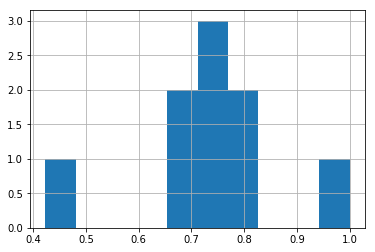

In [217]:
df_breastmass.corr()['Class'].hist()

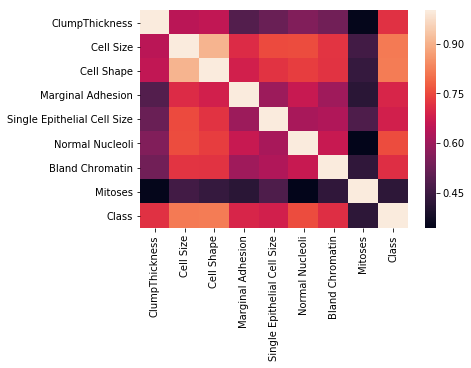

In [218]:
sns.heatmap(df_breastmass.corr())

### convert the datatype of Bare Nuclei to `int`

In [219]:
df_breastmass['Bare Nuclei'] = pd.to_numeric(df_breastmass['Bare Nuclei'])
df_breastmass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10)
memory usage: 54.6 KB


### Standardization of Data (Use Standard Scaler)

In [220]:
from sklearn.preprocessing import StandardScaler

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1D8F14F0>,
      dtype=object)

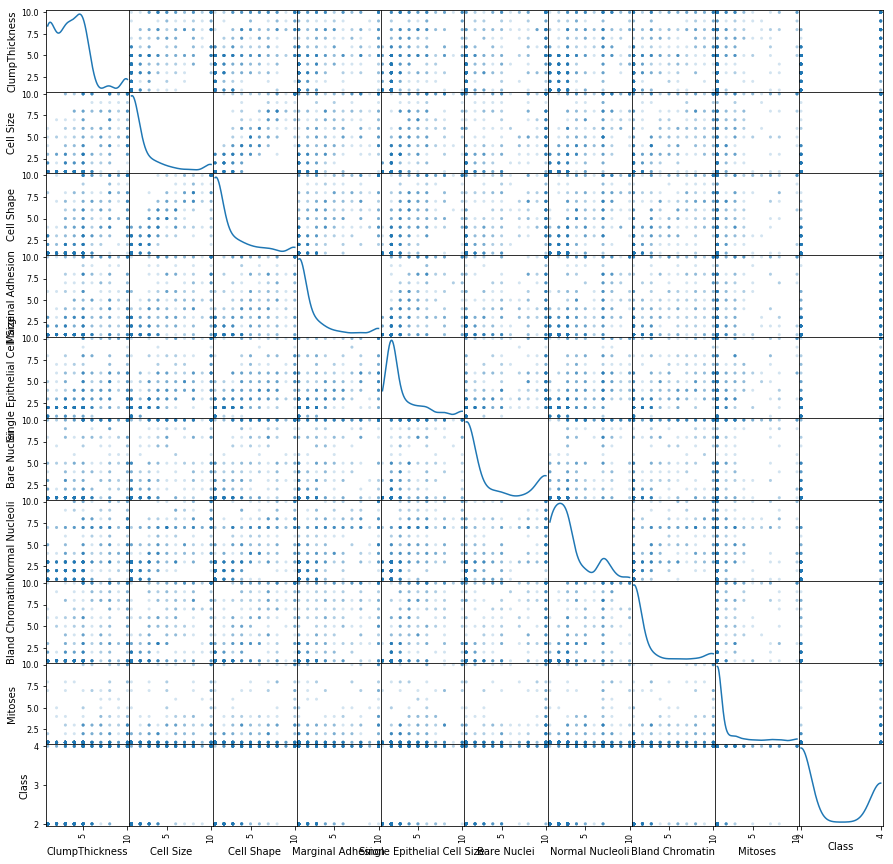

In [221]:
pd.scatter_matrix(df_breastmass,alpha=0.2, figsize=(15, 15), diagonal='kde')

### Divide the dataset into feature set and target set

In [222]:
X = df_breastmass.drop("Class", axis=1)
X_std = StandardScaler().fit_transform(X)

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [223]:
Y =  df_breastmass.pop("Class")

### Divide the Training and Test sets in 70:30 

In [224]:
train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.30, random_state=2)

### Model 1 : Implement a default Decision Tree model with no attributes

In [225]:
dt_model=DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(train_set,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [226]:
dt_model.feature_importances_

array([0.06804703, 0.68228943, 0.0263052 , 0.        , 0.03927305,
       0.15687851, 0.01732584, 0.00600993, 0.00387103])

### Check the training & test accuracy of model 1 

In [227]:
ypred = dt_model.predict(test_set)
metrics.accuracy_score(test_labels,ypred)

0.9238095238095239

### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [228]:
dt_model_1 = DecisionTreeClassifier(criterion = 'entropy',max_leaf_nodes=5, max_depth=10)
dt_model_1.fit(train_set,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [229]:
ypred_1 = dt_model_1.predict(test_set)
metrics.accuracy_score(test_labels,ypred_1)

0.9523809523809523

### Print the confusion matrix of model 1 and model 2

In [230]:
metrics.confusion_matrix(test_labels,ypred)

array([[135,   7],
       [  9,  59]], dtype=int64)

In [231]:
metrics.confusion_matrix(test_labels,ypred_1)

array([[135,   7],
       [  3,  65]], dtype=int64)